PREDICTING RAPE CASES(LINEAR REGRESSION)

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [70]:
dataset=pd.read_csv('Merged3.csv')
dataset=dataset.dropna()
dataset.columns

Index(['District', 'Area Type', 'Number of Households', 'Total Population',
       'Male Population', 'Female Population', 'Area (sq km)',
       'Population Density', 'State', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'RAPE', 'OTHER RAPE', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'ROBBERY', 'BURGLARY',
       'THEFT', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CAUSING DEATH BY NEGLIGENCE', 'Literacy',
       ' Estimated Unemployment Rate (%)'],
      dtype='object')

In [71]:
dataset2=dataset.drop(['Number of Households','DACOITY','ROBBERY','BURGLARY','THEFT','ARSON','CAUSING DEATH BY NEGLIGENCE'],axis=1)

In [74]:
le=LabelEncoder()
dataset2['District']=le.fit_transform(dataset2['District'])
dataset2['Area Type']=le.fit_transform(dataset2['Area Type'])
dataset2['State']=le.fit_transform(dataset2['State'])

In [76]:
#corr=dataset2.corr()
#sns.heatmap(corr,annot=True)

In [78]:
y=dataset2['RAPE']
X=dataset2.drop(['RAPE'],axis=1)

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred=model.predict(X_test)
y_pred

array([137.0229088 ,  14.99440416,  97.98311656, ...,  53.00222955,
        47.01515221,  28.00819341])

In [86]:
r_squared=r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [88]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r_squared}")

MAE: 0.011884698806552433
MSE: 0.004704178488736217
R-squared: 0.9999935039950083


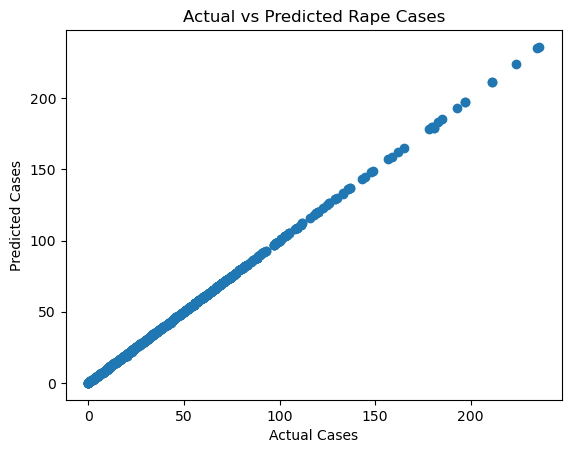

In [90]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("Actual vs Predicted Rape Cases")
plt.show()

In [92]:
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r_squared = r2_score(y_train, y_train_pred)
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R-squared: {train_r_squared}")
print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")
print(f"Test R-squared: {r_squared}")


Training MAE: 0.011654231878193505
Training MSE: 0.006161926680371825
Training R-squared: 0.9999940536432353
Test MAE: 0.011884698806552433
Test MSE: 0.004704178488736217
Test R-squared: 0.9999935039950083


COMPARISON OF RAPE CASES BY STATE OR DISTRICT(VISUALIZATION)

<Figure size 1500x700 with 0 Axes>

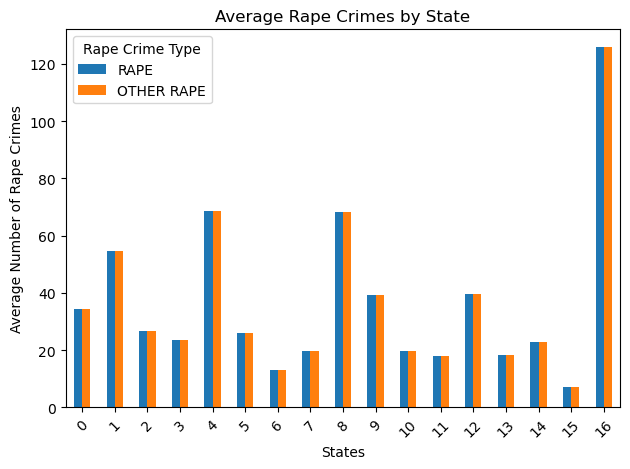

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
average_rape_by_state.set_index('State')[['RAPE', 'OTHER RAPE']].plot(kind='bar', stacked=False)
plt.title('Average Rape Crimes by State')
plt.ylabel('Average Number of Rape Crimes')
plt.xlabel('States')
plt.xticks(rotation=45)
plt.legend(title='Rape Crime Type')
plt.tight_layout()
plt.show()


In [98]:
unique_states = dataset['State'].unique()
states= pd.DataFrame({'State': unique_states})
print("States:")
print(states)

States:
               State
0   himachal pradesh
1      uttar pradesh
2          rajasthan
3       chhattisgarh
4     madhya pradesh
5             punjab
6         chandigarh
7        uttarakhand
8            haryana
9          jharkhand
10             bihar
11             assam
12    andhra pradesh
13           tripura
14         meghalaya
15       maharashtra
16       west bengal


RISK CLASSIFIER(KNN AND GEOSPATIAL)

In [102]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

In [104]:
dataset['Risky_Area']=dataset['RAPE'].apply(lambda x: 1 
                                            if x > dataset['RAPE'].mean()
                                            else 0)
X = dataset[['Total Population', 'Population Density', 'Literacy', ' Estimated Unemployment Rate (%)', 'RAPE', 'OTHER RAPE']]
y = dataset['Risky_Area']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [108]:
y_pred_knn = knn.predict(X_test)

In [110]:
y_pred

array([137.0229088 ,  14.99440416,  97.98311656, ...,  53.00222955,
        47.01515221,  28.00819341])

In [112]:
print("K-Nearest Neighbors Classification Report")
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1797
           1       0.90      0.82      0.86       996

    accuracy                           0.90      2793
   macro avg       0.90      0.88      0.89      2793
weighted avg       0.90      0.90      0.90      2793

KNN Accuracy:  0.9026136770497672


In [114]:
dataset['Predicted_Risk_Category'] = knn.predict(X)

In [115]:
import geopandas as gpd

In [116]:
#df=pd.read_csv('Merged3.csv')
#df.head()

In [120]:
gdf=gpd.read_file('C:\\Users\\KIIT0001\\Downloads\\2011_Dist.shp')
gdf.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.7601, 78.85102 19.75945,..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.4028, 78.19804 27.40278,..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.9467, 74.67393 19.93509,..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [122]:
#df=pd.read_csv('Merged3.csv')
#le=LabelEncoder()
#df=df[['Total Population', 'Population Density', 'Literacy', ' Estimated Unemployment Rate (%)', 'RAPE', 'Area (sq km)','Male Population', 'Female Population','State','District']]
#df['District']=le.fit_transform(df['District'])
#df['Area Type']=le.fit_transform(df['Area Type'])
#df['State']=le.fit_transform(df['State'])

In [124]:
gdf['DISTRICT']=gdf['DISTRICT'].str.strip().str.lower()
gdf['ST_NM']=gdf['ST_NM'].str.strip().str.lower()
dataset['District']=dataset['District'].str.strip().str.lower()
dataset['State']=dataset['State'].str.strip().str.lower()
#merged2=merged_data.drop(columns=('Unnamed: 0'))

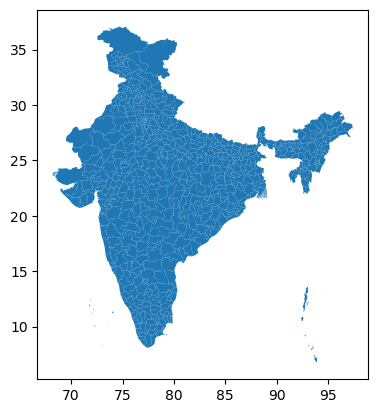

In [126]:
gdf.plot()
plt.show()

In [127]:
merged_data=gdf.merge(dataset,left_on=('ST_NM','DISTRICT'), right_on=('State','District'))
dataset['Predicted_Risk_Category'] = knn.predict(X)

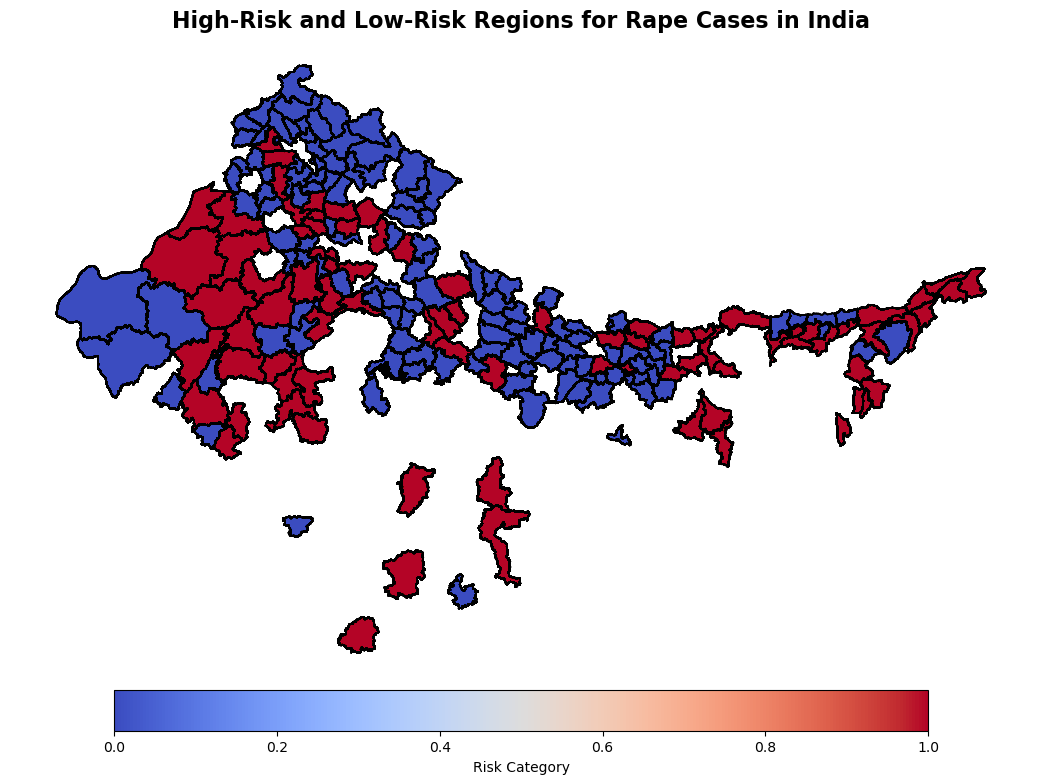

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1.2, edgecolor='black') 
merged_data.plot(column='Predicted_Risk_Category', ax=ax, legend=True,
                 legend_kwds={'label': "Risk Category",
                              'orientation': "horizontal",
                              'shrink': 0.7, 
                              'pad': 0.01},
                 cmap='coolwarm', edgecolor='grey', linewidth=0.5)
plt.title('High-Risk and Low-Risk Regions for Rape Cases in India', fontsize=16, fontweight='bold')
ax.set_axis_off()
plt.show()
